<a href="https://colab.research.google.com/github/RovilSurioJr/Numerical-Methods/blob/master/Numerical Differentiation/Numerical_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation
$_{\text{©L.J. Guy ©R.Surio ©M.A. Sustento ©T.J. Vallarta  | 2021 | Computational Methods for Computer Engineers}}$

In this module, we will learn how numerical differentiation works and how you can solve them computationally using Python and compare each results. This module will cover:

* Forward Finite Derivatives
* Central Fininte Derivatives
* Backward Fininte Derivatives
* Taylor Series Expansion

In [ ]:
import numpy as np
import math
import sympy as sy
from pandas import DataFrame
from sympy.functions import sin,cos
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.misc import derivative
plt.style.use("seaborn-poster")

In [ ]:
## Creating Pascal Triangle
binom_coeffs = lambda n : np.asarray([binom(n,k) for k in range(n+1)])
x = 0.1
dx = 0.01
y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )
y2 = lambda x : (np.cos(2*x)) + (x**2)/20 + np.exp(-2*x)

In [ ]:
def diff_cen(f,x,dx,degree=1):
    if degree % 2 == 0:
        f_ans = f(x+((np.arange(np.ceil(degree/2),-(np.ceil(degree/2)+1),-1))*dx))
        bin = binom_coeffs(degree)
        bin[1::2] *= -1
        diff = (bin @ f_ans) / (dx**degree)
    elif degree == 3:
        array = np.arange(np.ceil(degree/2),-(np.ceil(degree/2)+1),-1)
        f_ans = f(x+((np.delete(array,len(array)//2))*dx))
        bin = np.array([1,2,2,1])
        bin[1::2] *= -1
        diff = (bin @ f_ans) / (2*dx**degree)
    else:
        array = np.arange(np.ceil(degree/2),-(np.ceil(degree/2)+1),-1)
        f_ans = f(x+((np.delete(array,len(array)//2))*dx))
        bin = binom_coeffs(degree)
        bin[1::2] *= -1
        diff = (bin @ f_ans) / (2*dx**degree)
    return diff

In [ ]:
def diff_bwd(f,x,dx,degree=1):
    f_ans = f(x+((np.arange(0,-(degree+1),-1))*dx))
    bin = binom_coeffs(degree)
    bin[1::2] *= -1
    diff = (bin @ f_ans) / (dx**degree)
    return diff

In [ ]:
def diff_fwd(f,x,dx,degree=1):
    f_ans = f(x+((np.arange(degree,-1,-1))*dx))
    bin = binom_coeffs(degree)
    bin[1::2] *= -1
    diff = (bin @ f_ans) / (dx**degree)
    return diff

## Y1

In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_fwd(y1,x,dx,n))

0.9396682312481898
-0.49250950821845274
2.129163586548355
0.32210589673287154


In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_bwd(y1,x,dx,n))

0.9396682312481898
-0.5137063367627537
2.103159425123069
2.44101012469855


In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_cen(y1,x,dx,n))

0.9396682312481898
-0.5031079224906032
2.119682854430094
1.300208071264297


## Y2

In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_fwd(y2,x,dx,n))

1.7992973309192233
-2.0276083626139307
-0.5932774836159282
-4.532857641237341


In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_bwd(y2,x,dx,n))

1.7992973309192233
-2.022157328017027
-0.4940513772555555
-5.396264885604295


In [ ]:
degree = 3
for n in range(0,degree+1):
    print(diff_cen(y2,x,dx,n))

1.7992973309192233
-2.024882845315479
-0.5451034596903881
-4.9613053180186375


## Checking Error

### Y1 TABLE

In [ ]:

def error_fwd(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_fwd(y1,x,dx,n))
def error_bwd(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_bwd(y1,x,dx,n))
def error_cen(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_cen(y1,x,dx,n))

dy1 = np.array([[diff_fwd(y1,x,dx,1),diff_bwd(y1,x,dx,1),diff_cen(y1,x,dx,1)],
                [diff_fwd(y1,x,dx,2),diff_bwd(y1,x,dx,2),diff_cen(y1,x,dx,2)],
                [diff_fwd(y1,x,dx,3),diff_bwd(y1,x,dx,3),diff_cen(y1,x,dx,3)]
               ]) ## y1 differentiation result

dy1_error = np.array([[error_fwd(y1,1),error_bwd(y1,1),error_cen(y1,1)],
                      [error_fwd(y1,2),error_bwd(y1,2),error_cen(y1,2)],
                      [error_fwd(y1,3),error_bwd(y1,3),error_cen(y1,3)]
                    ]) ## y1 error

dy2 = np.array([[diff_fwd(y2,x,dx,1),diff_bwd(y2,x,dx,1),diff_cen(y2,x,dx,1)],
                [diff_fwd(y2,x,dx,2),diff_bwd(y2,x,dx,2),diff_cen(y2,x,dx,2)],
                [diff_fwd(y2,x,dx,3),diff_bwd(y2,x,dx,3),diff_cen(y2,x,dx,3)]
               ]) ## y2 differentiation result

dy2_error = np.array([[error_fwd(y2,1),error_bwd(y2,1),error_cen(y2,1)],
                      [error_fwd(y2,2),error_bwd(y2,2),error_cen(y2,2)],
                      [error_fwd(y2,3),error_bwd(y2,3),error_cen(y2,3)]
                      ]) ## y2 error

dfy1 = DataFrame(data= dy1,columns= ['Forward finite','Backward finite', 'Central finite'],index=['1','2','3'])
dfy1

,Forward finite,Backward finite,Central finite
1,-0.492510,-0.513706,-0.503108
2,2.129164,2.103159,2.119683
3,0.322106,2.441010,1.300208


In [ ]:
dfy1_error = DataFrame(data= dy1_error,columns= ['FWD Error','BWD Error', 'CEN Error'],index=['1','2','3'] )
dfy1_error

,FWD Error,BWD Error,CEN Error
1,0.010620,0.010577,0.000022
2,0.008894,0.017110,0.000587
3,0.978102,1.140802,0.000000


### Y2 TABLE

In [ ]:
dfy2 = DataFrame(data= dy2,columns= ['Forward finite','Backward finite', 'Central finite'],index=['1','2','3'] )
dfy2

,Forward finite,Backward finite,Central finite
1,-2.027608,-2.022157,-2.024883
2,-0.593277,-0.494051,-0.545103
3,-4.532858,-5.396265,-4.961305


In [ ]:
dfy2_error = DataFrame(data= dy2_error,columns= ['FWD Error','BWD Error', 'CEN Error'],index=['1','2','3'] )
dfy2_error

,FWD Error,BWD Error,CEN Error
1,0.010620,0.010577,0.000022
2,0.008894,0.017110,0.000587
3,0.978102,1.140802,0.000000


## Plotting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


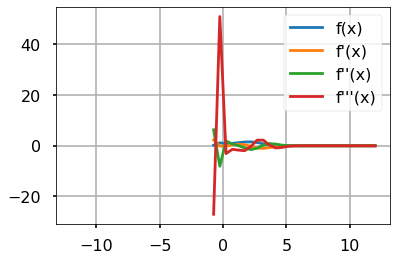

In [ ]:
X = np.linspace(-12,12)
plt.plot(X,y1(X), label='f(x)')
plt.plot(X,derivative(y1,X,dx), label='f\'(x)')
plt.plot(X,derivative(y1,X,dx,n=2), label='f\'\'(x)')
plt.plot(X,derivative(y1,X,dx,n=3,order=5), label='f\'\'\'(x)')
plt.legend()
plt.grid()
plt.show()

## Taylor Series Expansion

In [ ]:
XX = np.linspace(5,7)
a = 2*np.pi
n = 7
def taylor(f,a,n,x):
    y=0
    for i in range(n+1):
        y += ( ( (derivative(f,a,dx,n=i,order=9)) * ((x-a)**i) ) / np.math.factorial(i)  )
    return y

## Y1 using Taylor series Expansion

In [ ]:
# plt.axvline(x = 2*np.pi, c = "k")
plt.plot(XX,taylor(y1,a,n,XX),label='taylor series')
plt.plot(XX,y1(XX),label='Analytic',c="k")
plt.legend()
plt.grid()
plt.show()
        

## Y2 using Taylor series Expansion

In [ ]:
# plt.axvline(x = 2*np.pi, c = "k")
plt.plot(XX,taylor(y2,a,n,XX),label='taylor series')
plt.plot(XX,y2(XX),label='Analytic',c="k")
plt.grid()
plt.show()